This notebook is just for data exploration, clean data, grouping category for later train and evaluation better

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
from pathlib import Path


In [17]:
#route to root folder
BASE_DIR = Path.cwd().parent #Route to root folder of project
data_path = os.path.join(BASE_DIR, "dataset", "huffpost", "News_Category_Dataset_v3.json")

In [20]:
news = pd.read_json(data_path, lines=True)
print(news.head(5))

                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog y

In [22]:
news.category.unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

<Axes: xlabel='category'>

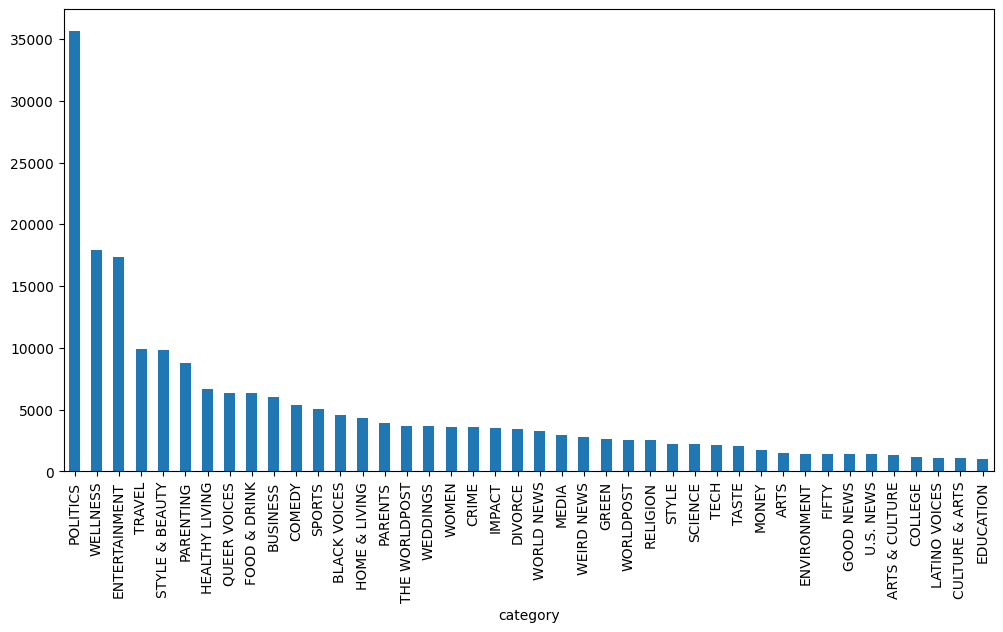

In [24]:
# Number of articles per category
news.category.value_counts().plot(kind='bar', figsize=(12,6))

There are some categories that could be grouped for easier identify and balance the dataset. I don't even want to categorize into the details.

In [25]:
news.category = news.category.replace({"HEALTHY LIVING": "WELLNESS",
              "QUEER VOICES": "GROUPS VOICES",
              "BUSINESS": "BUSINESS & FINANCES",
              "PARENTS": "PARENTING",
              "BLACK VOICES": "GROUPS VOICES",
              "THE WORLDPOST": "WORLD NEWS",
              "STYLE": "STYLE & BEAUTY",
              "GREEN": "ENVIRONMENT",
              "TASTE": "FOOD & DRINK",
              "WORLDPOST": "WORLD NEWS",
              "SCIENCE": "SCIENCE & TECH",
              "TECH": "SCIENCE & TECH",
              "MONEY": "BUSINESS & FINANCES",
              "ARTS": "ARTS & CULTURE",
              "COLLEGE": "EDUCATION",
              "LATINO VOICES": "GROUPS VOICES",
              "CULTURE & ARTS": "ARTS & CULTURE",
              "FIFTY": "MISCELLANEOUS",
              "GOOD NEWS": "MISCELLANEOUS"}
            )

In [26]:
news.category.unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'ARTS & CULTURE',
       'SCIENCE & TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS',
       'WEIRD NEWS', 'ENVIRONMENT', 'EDUCATION', 'CRIME', 'WELLNESS',
       'BUSINESS & FINANCES', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'GROUPS VOICES', 'HOME & LIVING', 'WOMEN', 'TRAVEL', 'RELIGION',
       'IMPACT', 'WEDDINGS', 'MISCELLANEOUS', 'DIVORCE'], dtype=object)

In [27]:
print(len(news.category.unique())) 

27


<Axes: xlabel='category'>

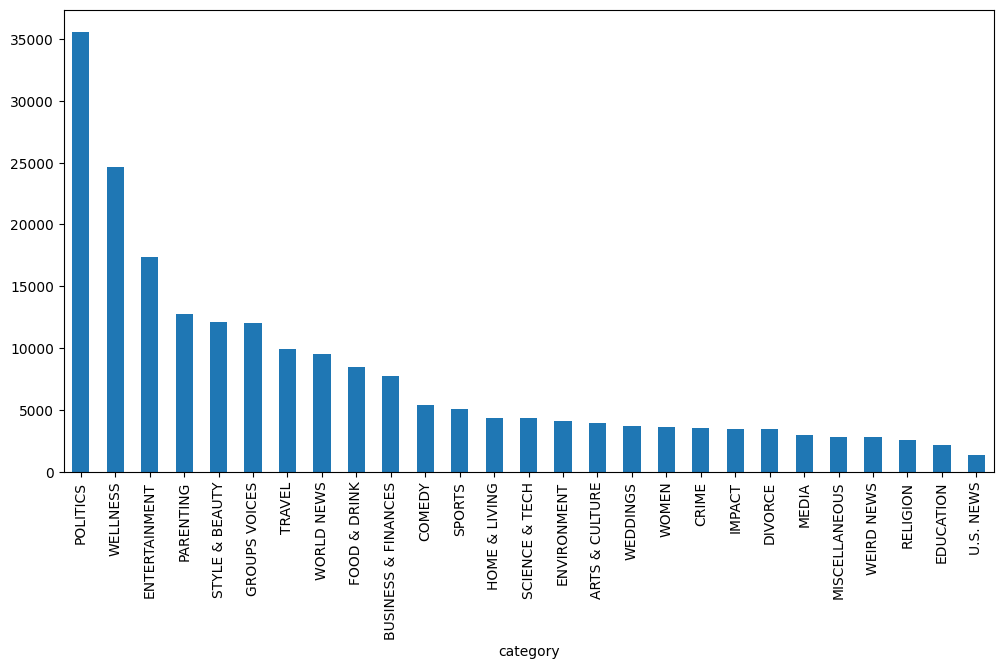

In [28]:
# Number of articles per category
news.category.value_counts().plot(kind='bar', figsize=(12,6))

In [29]:
# Check duplicates
print(f"Number of duplicates: {news.duplicated().sum()}")

Number of duplicates: 13


In [30]:
#Remove duplicates
news = news.drop_duplicates()

In [31]:
#Check NaN values
print(news.isna().sum())

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64


In [35]:
#check nan values in specific columns
print(news[news['headline'].isna()])

Empty DataFrame
Columns: [link, headline, category, short_description, authors, date]
Index: []


In [34]:
# Save csv file
news.to_csv(os.path.join(BASE_DIR, "dataset", "huffpost", "news_updated.csv"), index=False)